In [ ]:
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.errors as errors
import azure.cosmos.http_constants as http_constants
import json
import os
import csv

url = 'https://8d4abf2e-0ee0-4-231-b9ee.documents.azure.com:443/'
key = 'is5y6iEm1oTpKeu18XppWBSzgvX231mBVwyf9JgU8jgFjMG21UVD7FbjmG7GmD9lLnrv3sBXduqmNzaOFey3uw=='
client = cosmos_client.CosmosClient(url, {'masterKey': key})

In [ ]:
databaes_name = 'AccentureData'
database = client.get_database_client(databaes_name)
query = "SELECT MAX(databaes_nam) FROM databaes_name"
properties = database.query_containers(query=query,enable_cross_partition_query=True)


In [ ]:
import pandas as pd

container_name = 'ODL_ORDER_ITEM'
container = database.get_container_client(container_name)

query = "SELECT * FROM container_name WHERE container_name.id IN ('1','2','3')"

container_dict = container.query_items(
        query=query,enable_cross_partition_query=True)

In [ ]:
containers = [container['id'] for container in database.list_containers()]
containers

In [ ]:
for container_id in containers:
    container = database.get_container_client(container_id)
    iter_items = container.read_all_items(max_item_count=1000)
    keys = container.read_item("0","0").keys()
    
    with open(f'{container_id}.csv', 'w', newline='') as output_file:
            dict_writer = csv.DictWriter(output_file, keys)
            dict_writer.writeheader()
            dict_writer.writerows(iter_items)

In [ ]:
for container_id in containers:
    container = database.get_container_client(container_id)
    iter_items = container.read_all_items(max_item_count=1000)
    keys = container.read_item
    

In [5]:
import pandas as pd
pd.set_option('display.max_rows', 300)

read_none = ["None"]
order_item_df = pd.read_csv('/home/becode2/business_analysis/ODL_ORDER_ITEM.csv', na_values = read_none)
orderables_df = pd.read_csv('/home/becode2/business_analysis/ODL_ORDERABLES.csv', na_values = read_none)
order_df = pd.read_csv('/home/becode2/business_analysis/ODL_ORDER.csv', na_values = read_none)
allergy_customer_df = pd.read_csv('/home/becode2/business_analysis/ODL_ALLERGY_CUSTOMER.csv', na_values = read_none)
allergy_df = pd.read_csv('/home/becode2/business_analysis/ODL_ALLERGY.csv', na_values = read_none)
restaurant_df = pd.read_csv('/home/becode2/business_analysis/ODL_RESTAURANT.csv', na_values = read_none)

In [ ]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="geoapiExercises")

df = restaurant_df #dataframe is imported from csv before

nan_rest = df[df['city'].isna()] #streets with empty cities

"""first i tried to see if geocoder will find the same street in both cities"""
list_ny_street= []
for s in nan_rest['street']:
    try:
        place_ny = geolocator.geocode(f'{s}, New York')        
        if place_ny != None:
            list_ny_street.append({'street':s, 'city':'New York', 'result':place_ny})#this ditc is only so i can see the results and comapre street with place
    except:# the script will raise an error if a street is not found in NY so i skip that
        pass
    
list_sf_street= []
for s in nan_rest['street']:
    try:
        place_sf = geolocator.geocode(f'{s}, San Francisco')        
        if place_sf != None:
            list_sf_street.append({'street':s, 'city':'San Francisco', 'result':place_sf})
    except:
        pass
    
# After looking at both lists i realised that SF list was more accurate since NY list was looking at the state of NY

sf_street = []
for i in list_sf_street:#created q new list with the streets thqt belong in SF
    sf_street.append(i['street'])
    
for d1 in list_ny_street:#remove SF values that are still in NY list
    for d2 in list_sf_street:
        if d1['street'] == d2['street']:
            list_ny_street.remove(d1)
            
ny_street = []#created q new list with the final list of NY streets
for i in list_ny_street:
    ny_street.append(i['street'])
    
#added street values to the datframe

for i in ny_street:
    df.loc[df.street == i, ['city']] = "New York"

for i in sf_street:
    df.loc[df.street == i, ['city']] = "San Francisco"
    
ny_street_missing = ['Emmet Ct','Tenny Pl','Legion Memorial Square' ]
sf_street_missing = ['Doublerock St', 'Winn Way - Golden Gate National Recreation Area','S Hughes Ln - Golden Gate National Recreation Area','Harrison Blvd - Golden Gate National Recreation Area']

for i in ny_street_missing:
    df.loc[df.street == i, ['city']] = "New York"
    
for i in sf_street_missing:
    df.loc[df.street == i, ['city']] = "San Francisco"
    
df.to_csv('ODL_RESTAURANT.csv',mode='w+' ) #overwrite the csv

In [28]:
order_df

,restaurant_id,creation_date,customer_id,id,creation_date_only,creation_time
0,91,8/25/17 18:49,2858,17265,8/25/17,18:49
1,91,12/20/17 11:39,10055,44615,12/20/17,11:39
2,91,11/23/18 10:12,13703,137232,11/23/18,10:12
3,91,11/2/18 17:33,14698,131091,11/2/18,17:33
4,91,7/24/18 9:49,14299,102153,7/24/18,9:49
...,...,...,...,...,...,...
178719,404,2/8/19 18:23,19527,161413,2/8/19,18:23
178720,412,3/15/19 14:46,20362,173165,3/15/19,14:46
178721,402,1/3/19 10:19,9193,149327,1/3/19,10:19
178722,400,2/4/19 18:05,15050,160047,2/4/19,18:05


In [34]:
#avg repeat of costumer overall
order_df[['creation_date_only', 'creation_time']] = order_df['creation_date'].str.split(' ', 1, expand=True)
pd.to_datetime(order_df['creation_date_only'],format="%x")
order_df.groupby(['customer_id'])['restaurant_id'].count().sort_values(ascending=True).to_frame()['restaurant_id'].mean()

6.51563981042654

In [35]:
order_item_df_value = order_item_df.join(orderables_df[['price','name']], on='orderable_id')
order_item_df_value["order_value"] = order_item_df_value['price'].mul(order_item_df_value['amount'])
order_item_df_value #order item with total value per item

orders_value = order_item_df_value.groupby(['order_id'])['order_value'].sum().sort_values(ascending=False).to_frame()
orders_value #total value per order

order_value_df = order_df.join(orders_value['order_value'], on='id')
order_value_df['month_year']= pd.to_datetime(order_value_df['creation_date_only']).dt.strftime('%y/%m')
order_value_df['month']= pd.to_datetime(order_value_df['creation_date_only']).dt.strftime('%m')
order_value_df #total value per order with date,time, month and, month_year

,restaurant_id,creation_date,customer_id,id,creation_date_only,creation_time,order_value,month_year,month
0,91,8/25/17 18:49,2858,17265,8/25/17,18:49,131.1,17/08,08
1,91,12/20/17 11:39,10055,44615,12/20/17,11:39,155.5,17/12,12
2,91,11/23/18 10:12,13703,137232,11/23/18,10:12,247.9,18/11,11
3,91,11/2/18 17:33,14698,131091,11/2/18,17:33,146.9,18/11,11
4,91,7/24/18 9:49,14299,102153,7/24/18,9:49,128.4,18/07,07
...,...,...,...,...,...,...,...,...,...
178719,404,2/8/19 18:23,19527,161413,2/8/19,18:23,92.1,19/02,02
178720,412,3/15/19 14:46,20362,173165,3/15/19,14:46,176.9,19/03,03
178721,402,1/3/19 10:19,9193,149327,1/3/19,10:19,110.7,19/01,01
178722,400,2/4/19 18:05,15050,160047,2/4/19,18:05,57.6,19/02,02


<AxesSubplot:xlabel='month_year'>

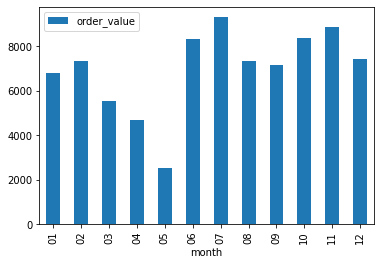

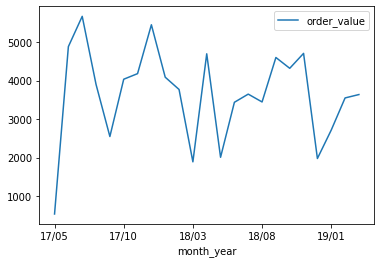

In [36]:
x = 100 #Id of restaurant
popular_month = order_value_df.loc[order_value_df['restaurant_id'] == x].groupby(['month'])['order_value'].sum().to_frame().sort_values('month').plot.bar(legend=True)
revenue_by_month = order_value_df.loc[order_value_df['restaurant_id'] == x].groupby(['month_year'])['order_value'].sum().to_frame().sort_values('month_year')
revenue_by_month.plot(legend=True)

In [38]:
resto_value_df = order_value_df.groupby(['restaurant_id'])['order_value'].sum().sort_values(ascending=False)
resto_value_df = resto_value_df.to_frame()
restaurant_revenue = restaurant_df.join(resto_value_df['order_value'], on='data_id',)
restaurant_revenue = restaurant_revenue.rename(columns={"order_value":"revenue"})
restaurant_revenue # revenue per restaurant

,order_value
restaurant_id,
200,147596.100000
17,141372.600000
0,135954.320709
53,133839.200000
212,130934.900000
...,...
422,1118.600000
419,1034.100000
421,828.200000


In [42]:
city_revenue = restaurant_revenue.groupby(['city'])['revenue'].sum().sort_values(ascending=False)
city_revenue revenue by city

city
New York         1.146373e+07
San Francisco    1.106843e+07
Name: revenue, dtype: float64

In [26]:
#cost per dish
orderables_df['cost'] = orderables_df['price'].mean()
orderables_df['profit'] = orderables_df['price'] - orderables_df['cost']
orderables_df.loc[orderables_df['profit']  0]

,id,price,restaurant_id,data_id,name,_rid,_self,_etag,_attachments,_ts,cost,profit
0,0,17.122222,244,1613,Peach tart,LFZbAInsZRQBAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""54000ab0-0000-0200-0000-622fb56c0000""",attachments/,1647293804,23.027961,-5.905739
3,3,8.925679,68,438,Subgum Shrimp Chow Mein,LFZbAInsZRQEAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""54000db0-0000-0200-0000-622fb56c0000""",attachments/,1647293804,23.027961,-14.102283
5,5,19.436465,242,1600,Dubonnet,LFZbAInsZRQGAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""54000fb0-0000-0200-0000-622fb56c0000""",attachments/,1647293804,23.027961,-3.591497
6,6,10.847465,173,1159,"Coconut Shrimp Jumbo shrimp, battered and dipp...",LFZbAInsZRQHAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""540010b0-0000-0200-0000-622fb56d0000""",attachments/,1647293805,23.027961,-12.180497
8,8,11.300000,18,123,"Domaine Carneros, Brut, 1992, Napa",LFZbAInsZRQJAAAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""540014b0-0000-0200-0000-622fb56d0000""",attachments/,1647293805,23.027961,-11.727961
...,...,...,...,...,...,...,...,...,...,...,...,...
2783,2783,18.400000,342,2242,Haddock,LFZbAInsZRTgCgAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""5400ebbd-0000-0200-0000-622fb6960000""",attachments/,1647294102,23.027961,-4.627961
2784,2784,8.300000,130,874,"Crozes-Hermitage, Vidal Fleury, 1994",LFZbAInsZRThCgAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""5400ecbd-0000-0200-0000-622fb6960000""",attachments/,1647294102,23.027961,-14.727961
2785,2785,12.500000,52,332,Fusilli Al Salmone CORKSCREW PASTA WITH SALMON...,LFZbAInsZRTiCgAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""5400eebd-0000-0200-0000-622fb6960000""",attachments/,1647294102,23.027961,-10.527961
2786,2786,15.800000,123,829,LONG-STEM DRISCOLL STRAWBERRIES DIPPED IN CHOC...,LFZbAInsZRTjCgAAAAAAAA==,dbs/LFZbAA==/colls/LFZbAInsZRQ=/docs/LFZbAInsZ...,"""5400efbd-0000-0200-0000-622fb6960000""",attachments/,1647294102,23.027961,-7.227961


city
New York         59091.378609
San Francisco    47915.267965
Name: revenue, dtype: float64

231